In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_samples, silhouette_score

In [7]:
df_min = np.min(iris.data,axis=0)
df_min

array([ 4.3,  2. ,  1. ,  0.1])

In [8]:
df_central = (iris.data-df_min)
df_central[0]

df_scalar = (np.max(iris.data,axis=0)-np.min(iris.data,axis=0))
df_scalar

d_nor = (df_central/df_scalar)
d_nor[0]

array([ 0.22222222,  0.625     ,  0.06779661,  0.04166667])

In [14]:
n_clusters = 3
cluster = KMeans(n_clusters, random_state=0, verbose=0).fit(d_nor[:,2:])

In [13]:
n_clusters = 3
cluster = KMeans(n_clusters, random_state=0, verbose=1).fit(d_nor[:,2:])
#Z = cluster.predict(d_nor[:,2:])
#center = cluster.cluster_centers_
#print(center)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.89513291166
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.73340577021
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.70509860812
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.70509860812
center shift 0.000000e+00 within tolerance 9.463838e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.73922013151
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.70509860812
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.70509860812
center shift 0.000000e+00 within tolerance 9.463838e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.80919459274
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.74409966203
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.7110915911
start iteration
done sortin

In [6]:
color = np.array([244, 220, 239])
color = np.vstack((color,np.array([222, 248, 252])))
color = np.vstack((color,np.array([247, 237, 200])))/255

In [7]:
label = iris.target #real lable
name = ['setosa', 'versicolor', 'virginica']# iris.data.target_names

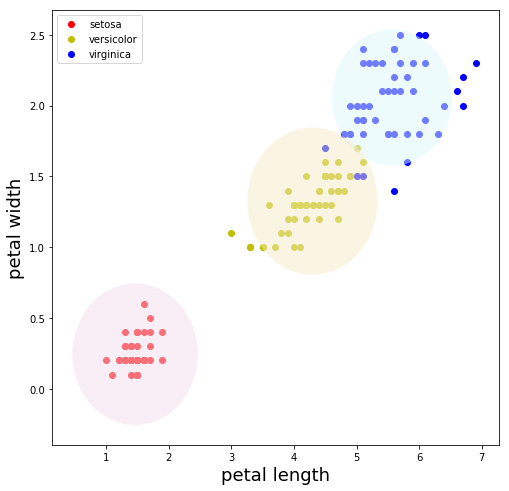

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

origin_center = center*df_scalar[2:]+df_min[2:]
for i in range(n_clusters):
    r = np.sum(Z==i)/len(Z)
    ellipse = Ellipse(xy=(origin_center[i,0], origin_center[i,1]), width=6*r, height=3*r, facecolor = color[i],lw=2)
    ellipse.set_alpha(0.5)
    ax.add_patch(ellipse)


c2 = ['r','y','b']
for j in range(3):
    idx = (label==j)
    z = iris.data[idx,2]
    y = iris.data[idx,3]
    plt.scatter(x = z,y= y, c=c2[j],label=name[j])
    
plt.xlabel('petal length',fontsize=18)
plt.ylabel('petal width',fontsize=18)
plt.legend(loc='best')
plt.show()

In [ ]:
# SSE & silhouette

In [ ]:
SSE = []
silhouette = []

In [ ]:
total_k = 10

silhouette.append(-1)
for n_clusters in range(1,total_k+1): 

    cluster = KMeans(n_clusters, random_state=0).fit(d_nor[:,2:])
    Z = cluster.predict(d_nor[:,2:])

    SSE.append(cluster.inertia_)
    if n_cluster != 1:
        silhouette.append(silhouette_score(_nor[:,2:], Z))

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

z = np.arange(1,total_k+1)
y = SSE
plt.scatter(x=z, y=y, c='w')
plt.plot(x=z, y=y, c='#AAAAAA', lw=3)
plt.plot(x=z, y=y, c='#AAAAAA', marker='.', mew='6')

plt.xlabel('Cluster Number', fontsize=25)
plt.ylabel('SSE', fontsize=25)
plt.legend()

plt.show()

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

z = np.arange(1,total_k+1)
y = silhouette
plt.scatter(x=z, y=y, c='w')
plt.plot(x=z, y=y, c='#AAAAAA', lw=3)
plt.plot(x=z, y=y, c='#AAAAAA', marker='.', mew='6')

plt.xlabel('Cluster Number', fontsize=25)
plt.ylabel('Silhouette', fontsize=25)
plt.legend()

plt.show()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])